## Distributions, PDFs/PMFs, CDF and sampling from distributions

Today, we are going to explore statistical distributions, create figures of their PDFs and PMFs, calculate their CDFs, and write some code to sample from the distributions.

But first, imports:

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

%matplotlib inline

### Let's start with the binomial distribution

Use LaTeX to write the equation for the PMF in the cell below. Use the form with *N* and *p*. [Here](https://www.overleaf.com/learn/latex/Mathematical_expressions) is a guide to writing mathematical expressions with LaTeX.

$
    \binom{n}{k} p^k(1-p)^{n-k}
$

### Create a function that can be used to compute P(x)

Your function will need three arguments. Hint: look at `math.factorial` for computing factorials and `math.pow` for exponents.

In [2]:
def binomial_pmf(p, n, k):
    fact = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    probability = fact*math.pow(p, k)*math.pow(1-p, n-k)
    
    return probability

In [6]:
binomial_pmf(0.5, 12, 6)

0.2255859375

### Call your function on the integers from 0 to N

Why can't it be bigger than N?

Hint: Look at `np.arange` for generating linearly spaced integers. List comprehensions are your friend here. For loops also work. A list comprehension is like a compressed for loop. Use either construct as you prefer, but the list comprehension might look like:

    [binomial_P(20, 0.5, n) for n in np.arange(0, 21)]

In [9]:
[binomial_pmf(0.5, 20, k) for k in np.arange(0, 21)]

[9.5367431640625e-07,
 1.9073486328125e-05,
 0.0001811981201171875,
 0.001087188720703125,
 0.004620552062988281,
 0.0147857666015625,
 0.03696441650390625,
 0.0739288330078125,
 0.12013435363769531,
 0.16017913818359375,
 0.17619705200195312,
 0.16017913818359375,
 0.12013435363769531,
 0.0739288330078125,
 0.03696441650390625,
 0.0147857666015625,
 0.004620552062988281,
 0.001087188720703125,
 0.0001811981201171875,
 1.9073486328125e-05,
 9.5367431640625e-07]

### Now, make a figure of *x* vs *P(x)*

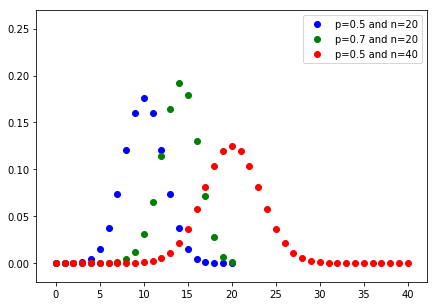

In [18]:
y1 = [binomial_pmf(0.5, 20, k) for k in np.arange(0, 21)]
y2 = [binomial_pmf(0.7, 20, k) for k in np.arange(0, 21)]
y3 = [binomial_pmf(0.5, 40, k) for k in np.arange(0, 41)]

fig = plt.figure(figsize=(7, 5))
ax1 = plt.scatter(np.arange(0, 21), y1, c='b', label='p=0.5 and n=20')
ax2 = plt.scatter(np.arange(0, 21), y2, c='g', label='p=0.7 and n=20')
ax3 = plt.scatter(np.arange(0, 41), y3, c='r', label='p=0.5 and n=40')
plt.legend()
plt.yticks(np.arange(0, 0.26, 0.05))
plt.ylim([-0.02, 0.27])
plt.show()

### Moving on, do the same thing for the Poisson distribution

Write the LaTeX in the cell below:

$
  \frac{\lambda^k e^{-\lambda}}{k!}
$

### Create a function for *P(x)*

Include arguments for $\lambda$ and *k*

In [8]:
def poisson_p(lamb, k):
    probability = math.pow(lamb, k)*math.exp(-lamb)/math.factorial(k)
    
    return probability

### Call your function on integers linearly spaced

In [9]:
[poisson_p(1, k) for k in np.arange(0, 21)]

[0.36787944117144233,
 0.36787944117144233,
 0.18393972058572117,
 0.06131324019524039,
 0.015328310048810098,
 0.0030656620097620196,
 0.0005109436682936699,
 7.299195261338141e-05,
 9.123994076672677e-06,
 1.0137771196302974e-06,
 1.0137771196302975e-07,
 9.216155633002704e-09,
 7.68012969416892e-10,
 5.907792072437631e-11,
 4.2198514803125934e-12,
 2.8132343202083955e-13,
 1.7582714501302472e-14,
 1.0342773236060278e-15,
 5.745985131144599e-17,
 3.0242027006024205e-18,
 1.5121013503012103e-19]

### Make a figure

Try to reproduce this figure:

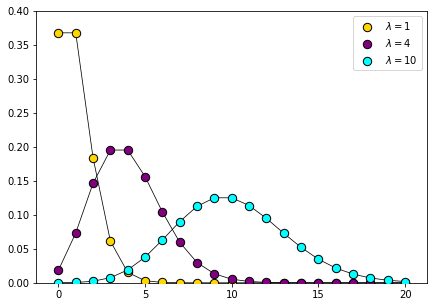

In [20]:
y1 = [poisson_p(1, k) for k in np.arange(0, 21)]
y2 = [poisson_p(4, k) for k in np.arange(0, 21)]
y3 = [poisson_p(10, k) for k in np.arange(0, 21)]

fig = plt.figure(figsize=(7, 5))

ax1 = plt.plot(np.arange(0, 21), y1, c='k', linewidth=0.75, zorder=0)
ax2 = plt.plot(np.arange(0, 21), y2, c='k', linewidth=0.75, zorder=1)
ax3 = plt.plot(np.arange(0, 21), y3, c='k', linewidth=0.75, zorder=2)

ax1 = plt.scatter(np.arange(0, 21), y1, s=70, c='gold', edgecolors='k', label='$\lambda =1$', zorder=3)
ax2 = plt.scatter(np.arange(0, 21), y2, s=70, c='purple', edgecolors='k', label='$\lambda =4$', zorder=4)
ax3 = plt.scatter(np.arange(0, 21), y3, s=70, c='cyan', edgecolors='k', label='$\lambda =10$', zorder=5)
plt.legend()
#plt.yticks(np.arange(0, 0.26, 0.05))
plt.ylim([0, 0.4])
plt.show()

What's wrong with this figure btw?

### Enough discrete distributions. Let's try a continuous one, the normal distribution

Begin by writing the *P(x)* equation

$
  \frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
$

### Write a function that implements *P(x)*

In [29]:
def normal_p(x, mu, sigma):
    coef = math.pow(2*math.pi*math.pow(sigma, 2), -0.5)
    probability = coef*math.exp(-math.pow(x-mu, 2)/(2*math.pow(sigma, 2)))
    return probability

In [70]:
normal_p(5, 0, 1)

1.4867195147342977e-06

### Call your function on a list of numbers

Hint: look at `np.linspace`

In [33]:
[normal_p(x, 0, 1) for x in np.linspace(-10, 10, 20)]

[7.69459862670642e-23,
 1.6485437289111684e-18,
 1.1662784480831181e-14,
 2.7245281949674377e-11,
 2.101685077170377e-08,
 5.353419200482968e-06,
 0.00045027946514195825,
 0.012506054257598969,
 0.11469533473205255,
 0.34734293966681634,
 0.3473429396668167,
 0.11469533473205289,
 0.012506054257598969,
 0.00045027946514195825,
 5.353419200482986e-06,
 2.1016850771703843e-08,
 2.7245281949674474e-11,
 1.1662784480831181e-14,
 1.648543728911192e-18,
 7.69459862670642e-23]

### Reproduce this figure:

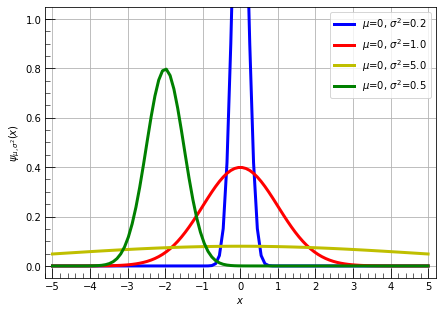

In [66]:
y1 = [normal_p(x, 0, 0.2) for x in np.linspace(-5, 5, 100)]
y2 = [normal_p(x, 0, 1.0) for x in np.linspace(-5, 5, 100)]
y3 = [normal_p(x, 0, 5.0) for x in np.linspace(-5, 5, 100)]
y4 = [normal_p(x, -2, 0.5) for x in np.linspace(-5, 5, 100)]

fig = plt.figure(figsize=(7, 5))

ax1 = plt.plot(np.linspace(-5, 5, 100), y1, c='b', linewidth=3, label='$\mu$=0, $\sigma^{2}$=0.2')
ax2 = plt.plot(np.linspace(-5, 5, 100), y2, c='r', linewidth=3, label='$\mu$=0, $\sigma^{2}$=1.0')
ax3 = plt.plot(np.linspace(-5, 5, 100), y3, c='y', linewidth=3, label='$\mu$=0, $\sigma^{2}$=5.0')
ax4 = plt.plot(np.linspace(-5, 5, 100), y4, c='g', linewidth=3, label='$\mu$=0, $\sigma^{2}$=0.5')

plt.legend()
plt.yticks(np.linspace(0, 1.0, 6))
plt.ylim([-0.05, 1.05])
plt.xticks(np.linspace(-5, 5, 11))
plt.xlim([-5.2, 5.2])
plt.xlabel('$x$')
plt.ylabel('$\psi_{\mu,\sigma^{2}}(x)$')
plt.grid(True)
plt.minorticks_on()
plt.tick_params(direction='in', length=10)
plt.tick_params(which='minor', direction='in', length=5)
plt.show()

### OK, now to CDFs

Let's look at the CDF for an empirical distribution. Recall this from our descriptive statistics notebook.

In [72]:
d1 = np.random.normal(loc=-6.4, scale=1.2, size=40000)
d2 = np.random.normal(loc=4, scale=10, size=16000)
d3 = np.random.normal(loc=22, scale=8, size=72000)
population = np.concatenate([d1, d2, d3])
pop = pd.DataFrame(data=population, columns=['population'])
pop.head()

,population
0,-5.994337
1,-6.250331
2,-5.099655
3,-5.558740
4,-6.940224


### First, plot a histogram of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D17AE58A20>]],
      dtype=object)

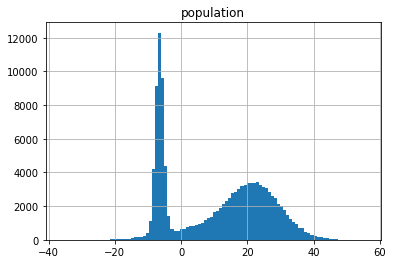

In [74]:
pop.hist(bins=100)

### Now let's make a function to interpolate our histogram

If you aren't sure what interpolation is, read [this](url).

Call your function inverse_CDF and have it take two arguments:

* `data` which is a list of values that are the empirical distribution you want to construct the CDF from.
* `bins` which is the number of bins to use in the histogram used to interpolate the CDF.

The function should use np.histogram to create data objects (not plots) that contain binned data. Hint: your call will look something like:

`hist_data, bin_edges = np.histogram(data, bins=bins, density=True)`

Why are we using the `density=True` parameter?

Remember that the CDF is the cumulative sum of the probability density function. This means we can create a new list with an entry for each bin and use np.cumsum to sum across a list that is the histogram density * width of the bin. Here is what I came up with:

`cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
cdf_bins = np.insert(cdf_bins, 0, 0)`

Two questions for you:
* `np.diff` computes the bin width. Why?
* Why do I have the `np.insert`?

`scipy` has a nice interpolation family of functions.

`import scipy.interpolate

inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)`

Google that (or use the documentation) for more information. Hint: make sure the function output both the CDF and the inverse CDF.

Note that the `scipy.interpolate.interp1d` interface returns something like a function that you can call and pass values e.g. `inv_cdf([0.1, 0.2, 0.3])`

In [85]:
def inverse_cdf(data, bins=100):
    hist_data, bin_edges = np.histogram(data, bins=100, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    
    inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)
    
    return [cdf, inv_cdf]

If you did it right, the cell below should use your function to create interpolations of the CDF and the inverse CDF:

In [87]:
[cdf, inv_cdf] = inverse_cdf(pop, 100)

### Plot the CDF

In [89]:
x = np.linspace(np.min(pop), np.max(pop), num=100)

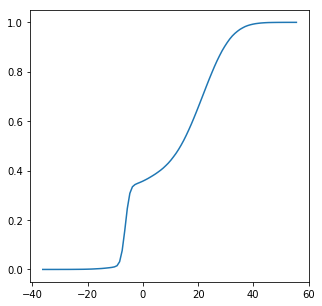

In [94]:
plt.figure(figsize=(5, 5))
plt.plot(x, cdf(x))

In [91]:
zero2one = np.linspace(0, .9999, num=100)

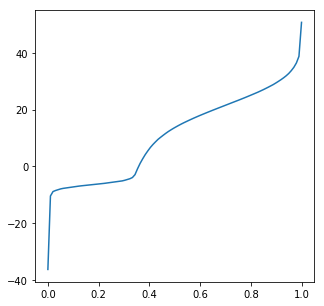

In [93]:
plt.figure(figsize=(5, 5))
plt.plot(zero2one, inv_cdf(zero2one))

### Now you can sample from your inverse CDF to generate values from our empirical distribution

Let's do that with `np.random.rand`. Why are we using this random function? What is special about how it works that makes it useful with inverse CDF?

OK, let's put this together with something like:

`sample = inv_cdf(np.random.rand(1000))`

In [95]:
sample = inv_cdf(np.random.rand(1000))

Now make a histogram of sample and set the bins to 100. How does it look? What happens when you increase the argument to `np.random.rand`?

(0, 0.15)

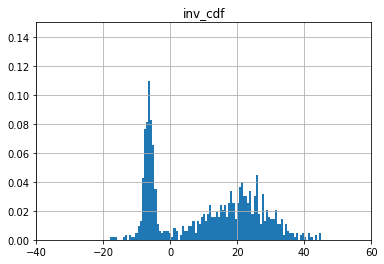

In [108]:
sample = inv_cdf(np.random.rand(1000))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

(0, 0.15)

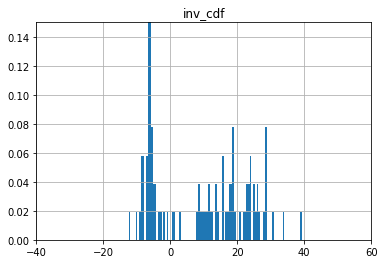

In [109]:
sample = inv_cdf(np.random.rand(100))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

(0, 0.15)

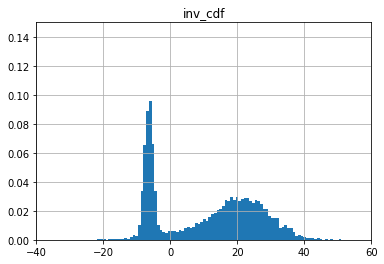

In [110]:
sample = inv_cdf(np.random.rand(10000))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

(0, 0.15)

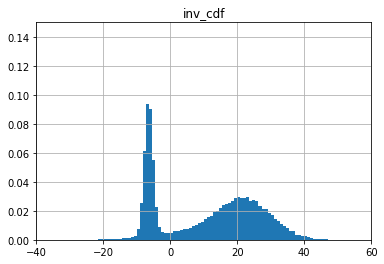

In [111]:
sample = inv_cdf(np.random.rand(100000))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

(0, 0.15)

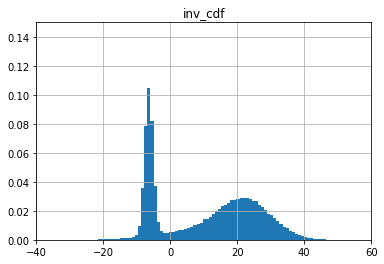

In [112]:
sample = inv_cdf(np.random.rand(1000000))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])